## 1. Imports and Data Loading

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Resolve src directory
BASE_DIR = os.path.dirname(os.getcwd())

DATA_PATH = os.path.join(BASE_DIR, "data", "processed", "final.csv")

df = pd.read_csv(DATA_PATH)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6563,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 2. Dataset Overview

In [3]:
print("Shape:", df.shape)
df.info()
df.describe(include="all")

Shape: (892, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Survived     892 non-null    int64  
 2   Pclass       892 non-null    int64  
 3   Name         892 non-null    object 
 4   Sex          892 non-null    object 
 5   Age          892 non-null    float64
 6   SibSp        892 non-null    int64  
 7   Parch        892 non-null    int64  
 8   Ticket       892 non-null    object 
 9   Fare         892 non-null    float64
 10  Embarked     892 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,892.000000,892.000000,892.000000,892,892,892.000000,892.000000,892.000000,892,892.000000,892
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,2,578,NaN,NaN,NaN,7,NaN,646
mean,446.500000,0.383408,2.309417,NaN,NaN,29.042601,0.522422,0.381166,NaN,24.031391,NaN
std,257.642517,0.486489,0.835923,NaN,NaN,12.065705,1.102264,0.805706,NaN,20.483193,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,2.500000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.750000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,446.500000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,669.250000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


## 3. Missing values Heatmap

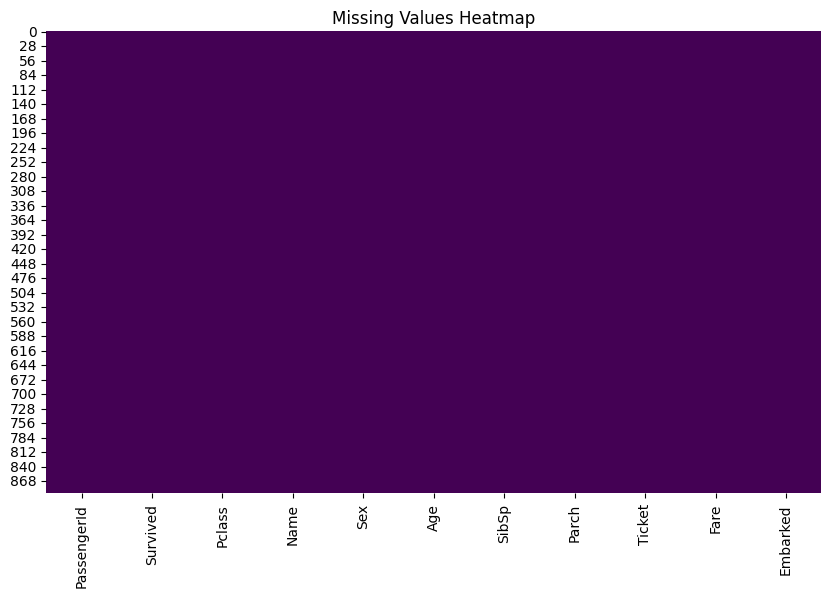

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

## 4. Correlation Matrix

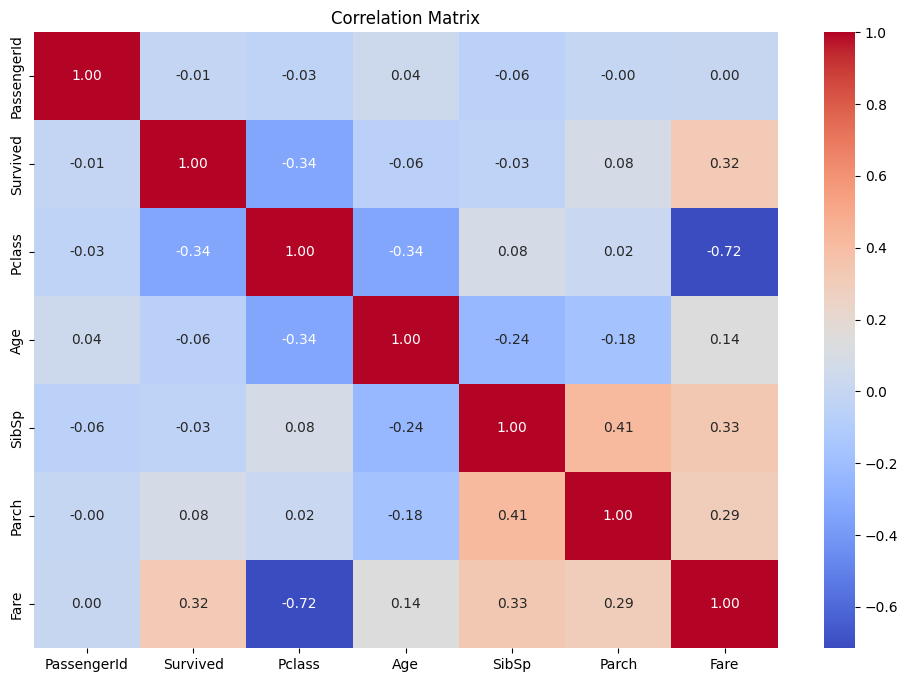

In [5]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include="number")
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 5. Numerical Feature Distribution

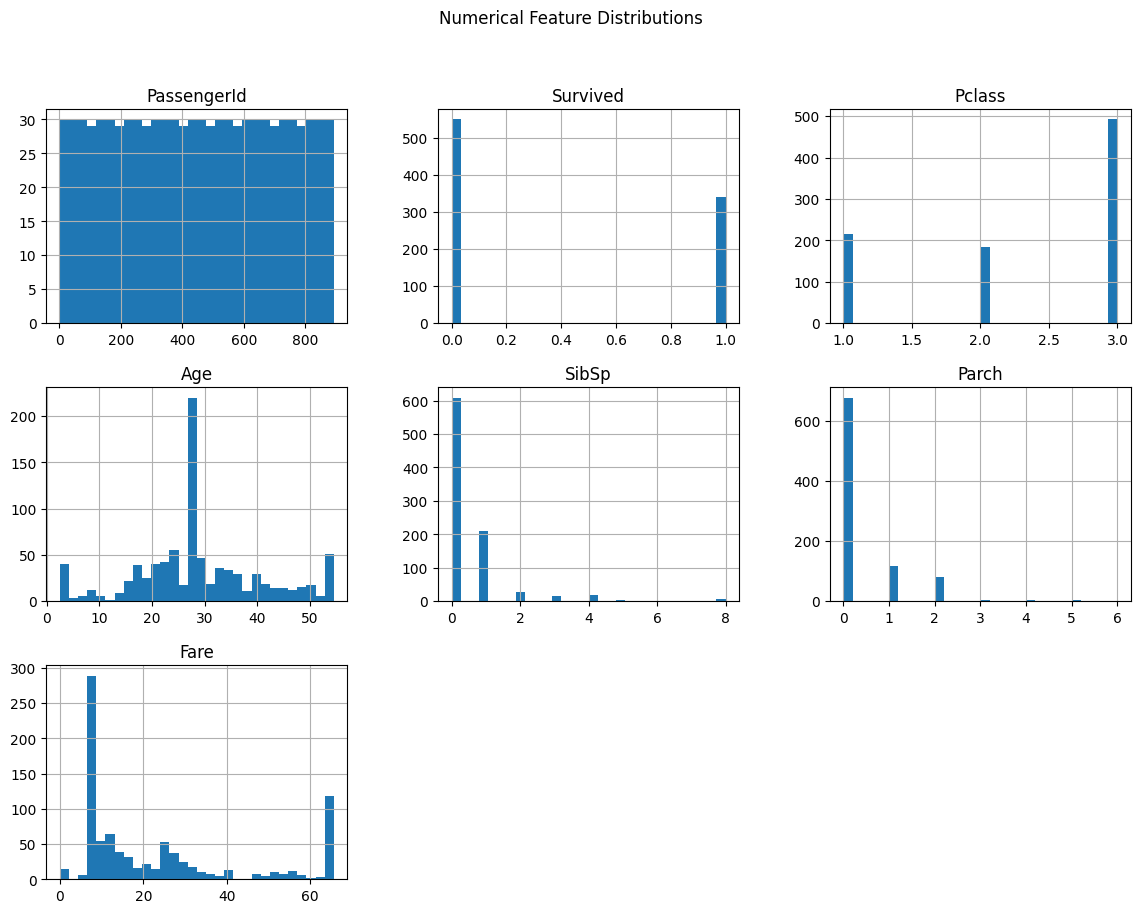

In [6]:
numeric_df.hist(figsize=(14, 10), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()

## 6. Target Distribution (Survived)

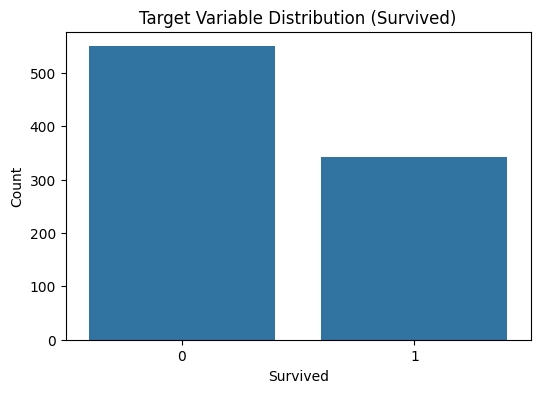

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df)
plt.title("Target Variable Distribution (Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

## 7. Categorical Insights

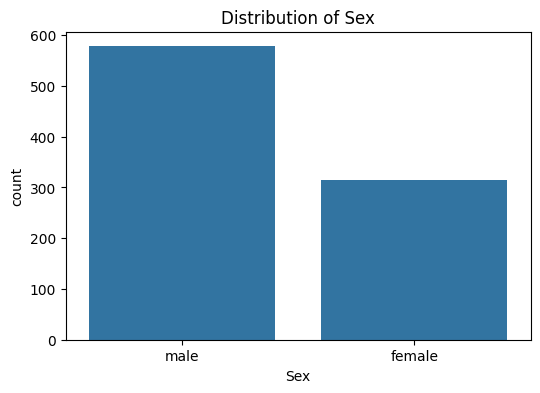

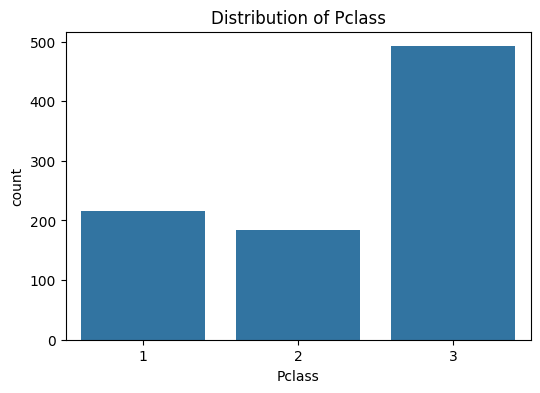

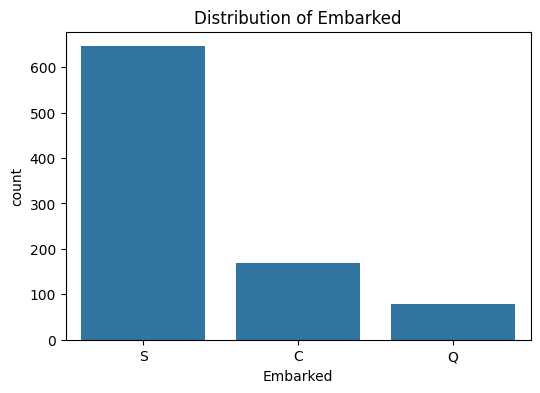

In [8]:
categorical_cols = ["Sex", "Pclass", "Embarked"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

## 8. Survival Rate by Key Features

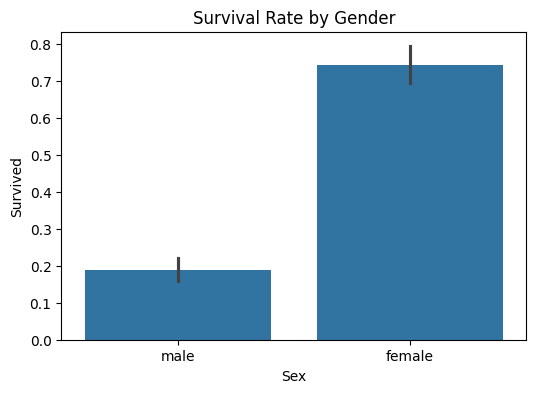

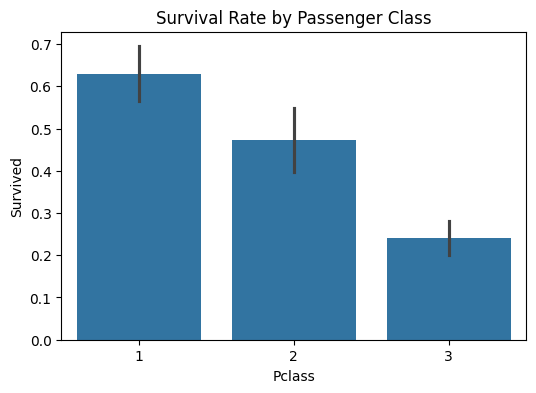

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()